In [47]:
import pandas as pd 
import matplotlib.pyplot as plt 
import json

In [48]:
csv = pd.read_csv('./Datasets/sales.csv')
excel = pd.read_excel('./Datasets/sales.xlsx')
with open('./Datasets/sales.json','r') as file:
    json = json.load(file)
json = pd.json_normalize(json)

In [49]:
# Explore CSV data
print(csv.info())
print(csv.head())

# Explore JSON data
print(json.info())
print(json.head())

# Explore Excel data
print(excel.info())
print(excel.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [50]:
csv_data = csv.dropna()
json_data = json.dropna()
excel_data = excel.dropna()

In [51]:
csv_data = csv_data.drop_duplicates()
json_data = json_data.drop_duplicates()
excel_data = excel_data.drop_duplicates()

In [52]:
unified_data = pd.concat([csv_data, json_data, excel_data], ignore_index=True)

In [53]:
unified_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Discount,Profit,Shipping Cost,Order Priority
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
unified_data['Total Sales'] = unified_data['Unit price'] * unified_data['Quantity']

In [55]:
unified_data.describe()

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [56]:
product_sales = unified_data.groupby('Product line')['Total Sales'].sum()
print(product_sales)

Product line
Electronic accessories    51750.03
Fashion accessories        51719.9
Food and beverages        53471.28
Health and beauty         46851.18
Home and lifestyle        51297.06
Sports and travel         52497.93
Name: Total Sales, dtype: object


In [57]:
total_sales = unified_data['Total Sales'].sum()
average_order_value = unified_data['Total Sales'].mean()
print(f"Total Sales: {total_sales}")
print(f"Average Order Value: {average_order_value}")

Total Sales: 307587.38000000035
Average Order Value: 307.58738000000034


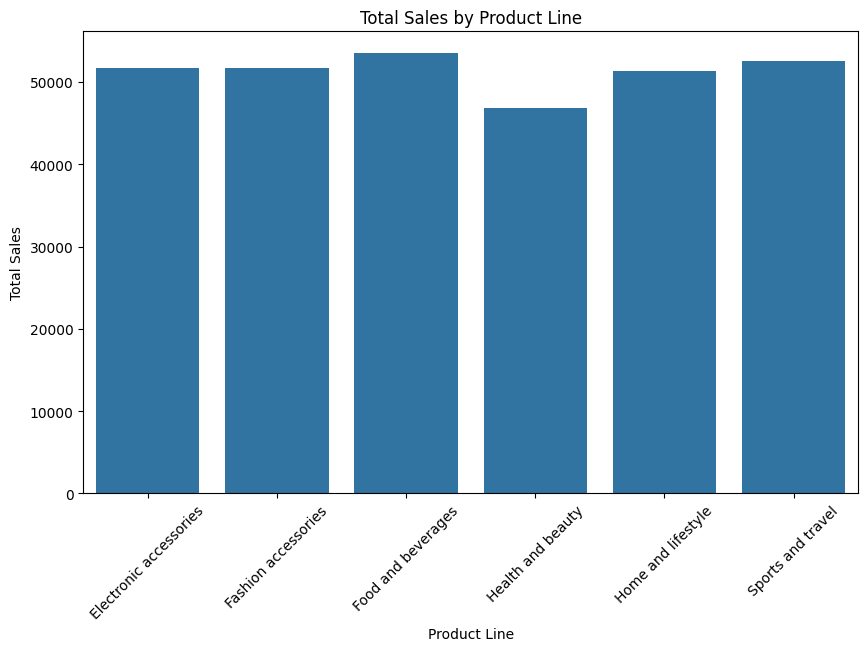

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for product sales
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

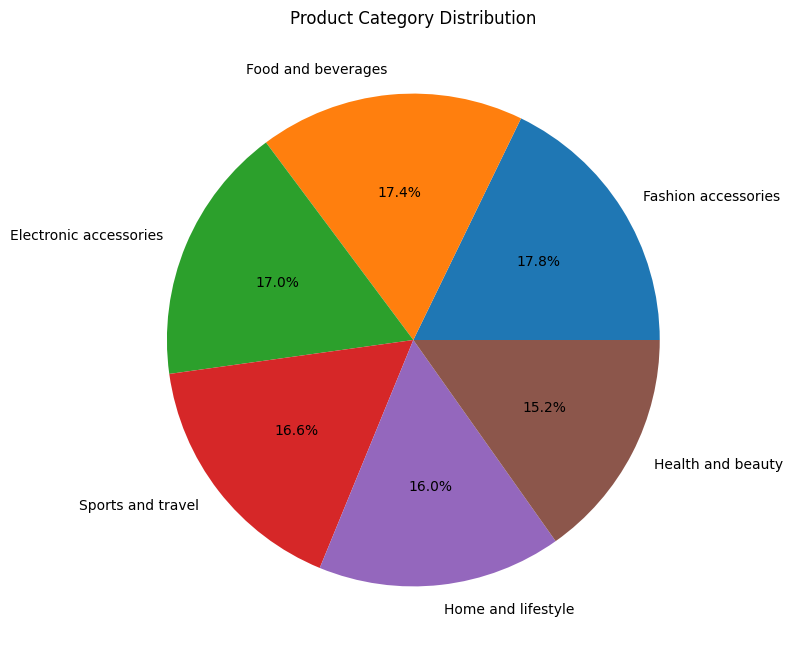

In [59]:
plt.figure(figsize=(8, 8))
unified_data['Product line'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.ylabel('')
plt.show()

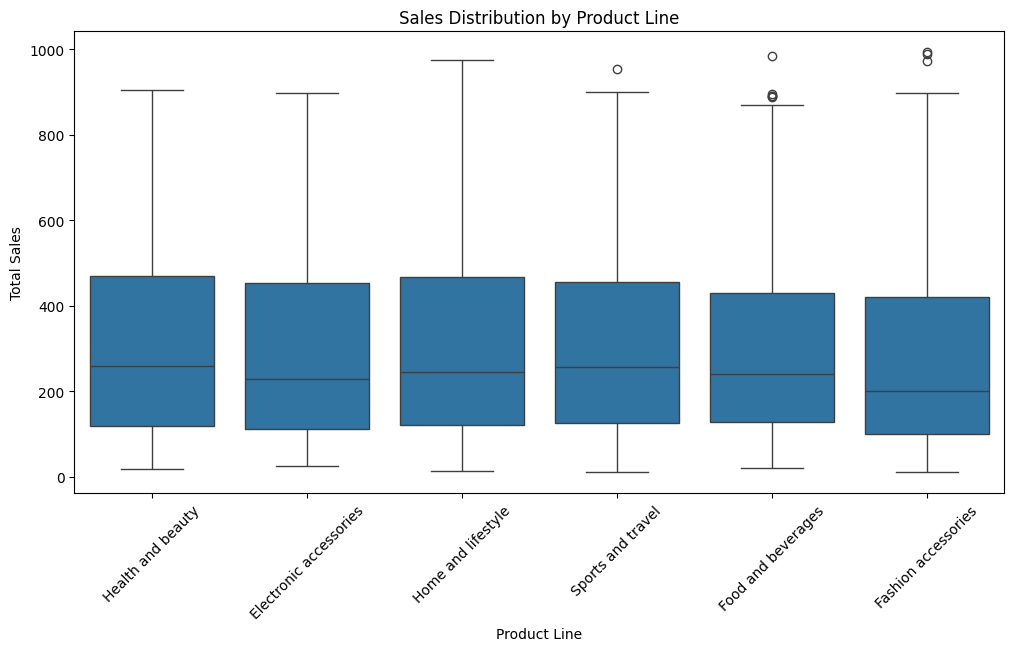

In [60]:
# Box plot for sales distribution by product line
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product line', y='Total Sales', data=unified_data)
plt.title('Sales Distribution by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

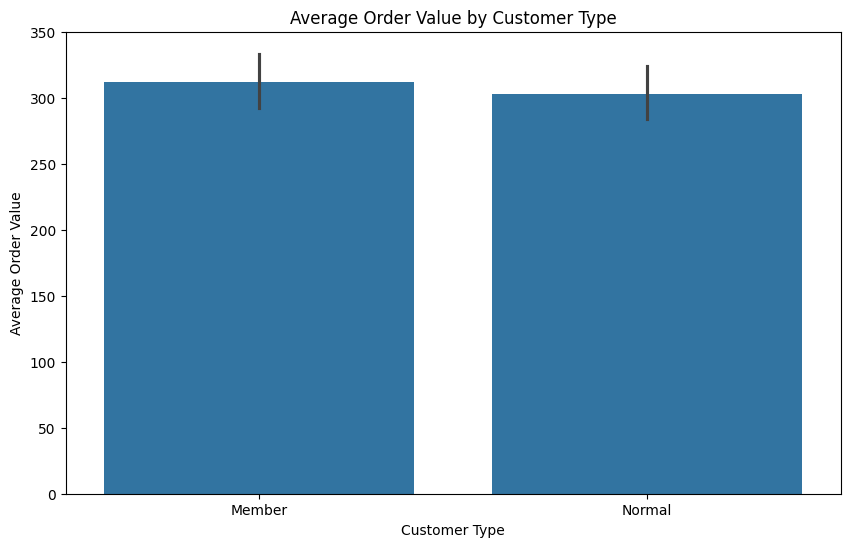

In [63]:
import numpy as np
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer type', y='Total Sales', data=unified_data, estimator=np.mean)
plt.title('Average Order Value by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Order Value')
plt.show()